**Project Description:**

**This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.**

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:
1.	A single cell estimate of the population 16+ for each state.
2.	Controls for Hispanic Origin by age and sex.
3.	Controls by Race, age and sex.
We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.



In [2]:
# Importing Necessary Libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing  import power_transform, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import  accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
import pickle
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing the Dataset:
census=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")

In [4]:
# To display top 5 rows:
census.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
# To display total number of rows and columns:
census.shape

(32560, 15)

**There are 32560 rows and 15 columns.**

In [6]:
# To display all the columns:
census.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [7]:
# Checking datatypes all the columns present:
census.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

**There are int and object datatypes are present in this given dataset.**

In [8]:
# Finding the null values:
census.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

**Great , There are no null values . We can go ahead.**

In [9]:
# To display brief information of data:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


**As we have to predict the Target Variable . So let's start working on target variable.**

In [10]:
# Checking unique values in the target variable:
census['Income'].unique()

array([' <=50K', ' >50K'], dtype=object)

**There are only two values in the target variable.**

In [11]:
# To display value counts in the target variable:
census['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [12]:
(census==' ?').sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [13]:
census.replace({' ?': np.nan}, inplace=True)

In [14]:
# let's again check for null values:
census.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

**There are some columns where null values are present . We will treat these null values.**

In [15]:
# To get the descriptive statistics of data:
census.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# Data Cleaning:

In [16]:
#checking all values of column 'Workclass'
census["Workclass"].unique() 

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', nan, ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [17]:
#checking repeated values in "Workclass" column through mode so that we can fill null values with the mode :
print(census["Workclass"].mode())

0     Private
Name: Workclass, dtype: object


In [18]:
#Filling Null Values of "Workclass" column in dataset by mode value with repeated value that is 'Private'
census["Workclass"].fillna(census["Workclass"].mode()[0], inplace=True)

In [19]:
#checking all values of column 'Occupation'
census["Occupation"].unique() 

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', nan, ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [20]:
#checking repeated values in "Occupation" column through mode
print(census["Occupation"].mode())

0     Prof-specialty
Name: Occupation, dtype: object


In [21]:
#Filling Null Values of "Occupation" column in dataset by mode value with repeated value that is 'Prof-specialty'
census["Occupation"].fillna(census["Occupation"].mode()[0], inplace=True)

In [22]:
#checking all values of column 'Native_country'
census["Native_country"].unique() 

array([' United-States', ' Cuba', ' Jamaica', ' India', nan, ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [23]:
#checking repeated values in "Native_country" column through mode
print(census["Native_country"].mode())

0     United-States
Name: Native_country, dtype: object


In [24]:
#Filling Null Values of "Native_country" column in dataset by mode value with repeated value that is 'United-States'
census["Native_country"].fillna(census["Native_country"].mode()[0], inplace=True)

In [25]:
#Filling Null Values of "Capital_gain" column in dataset by mean value
census["Capital_gain"].fillna(census["Capital_gain"].mean(), inplace=True)

In [26]:
#Filling Null Values of "Capital_loss" column in dataset by mean value
census["Capital_loss"].fillna(census["Capital_loss"].mean(), inplace=True)

In [27]:
# To verify , if the null values are filled or not:
census.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

# Data Visualization:

In [28]:
# Univariate Analysis:

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


<AxesSubplot:xlabel='Workclass', ylabel='count'>

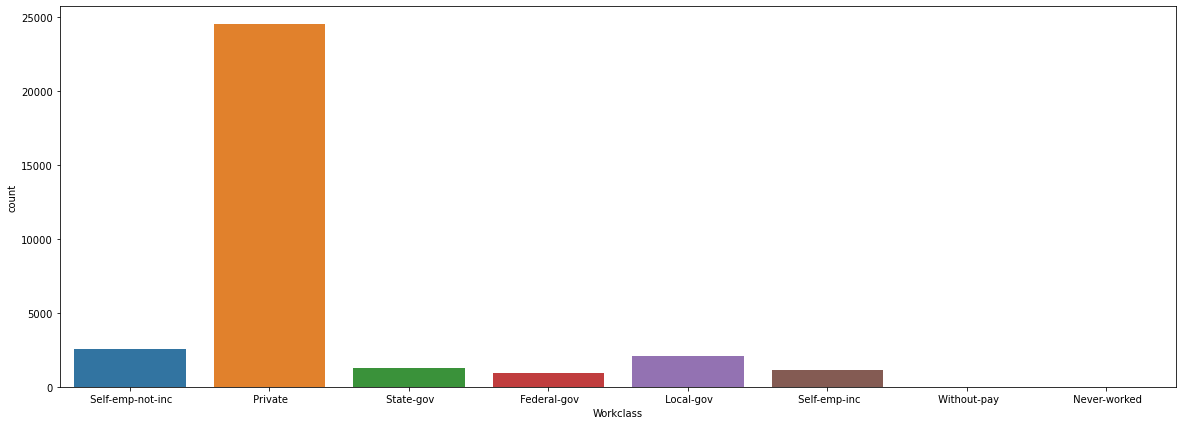

In [29]:
#Count Plot for "Workclass" column
print(census["Workclass"].value_counts())

plt.figure(figsize=(20,7))
sns.countplot("Workclass",data=census)

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64


<AxesSubplot:xlabel='Education', ylabel='count'>

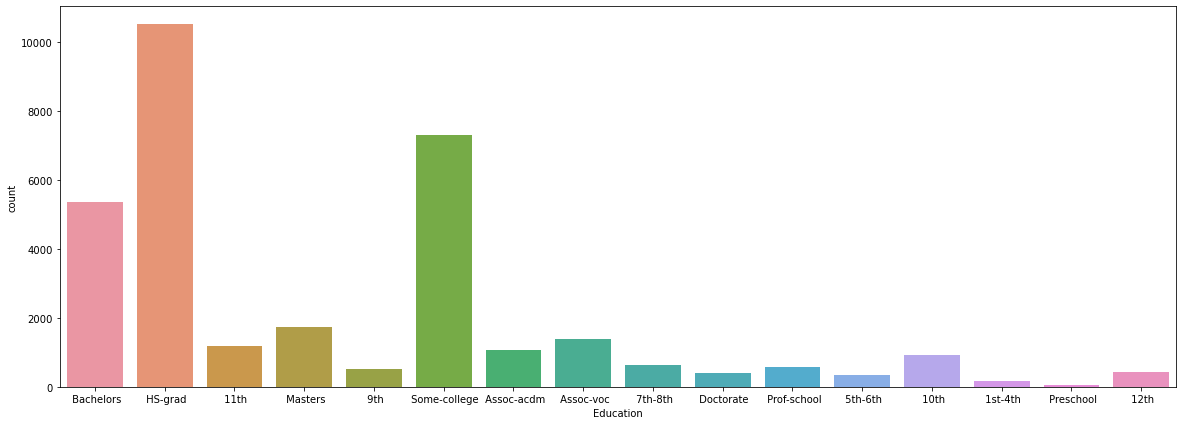

In [30]:
#Count Plot for "Education" column
print(census["Education"].value_counts())

plt.figure(figsize=(20,7))
sns.countplot("Education",data=census)


 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64


<AxesSubplot:xlabel='Marital_status', ylabel='count'>

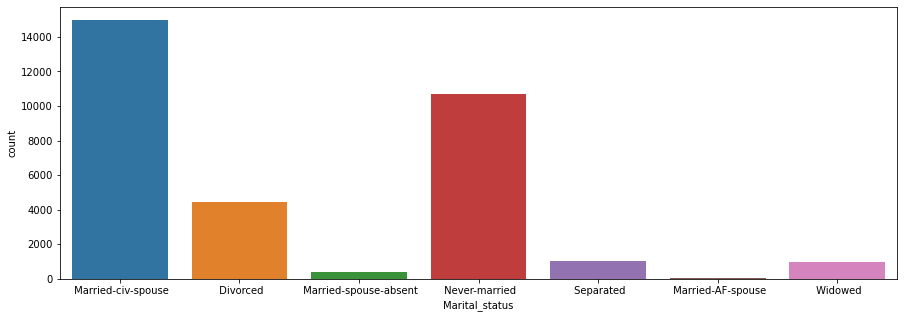

In [31]:
#Count Plot for "Marital_status" column
print(census["Marital_status"].value_counts())

plt.figure(figsize=(15,5))
sns.countplot("Marital_status",data=census)

 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64


<AxesSubplot:xlabel='Occupation', ylabel='count'>

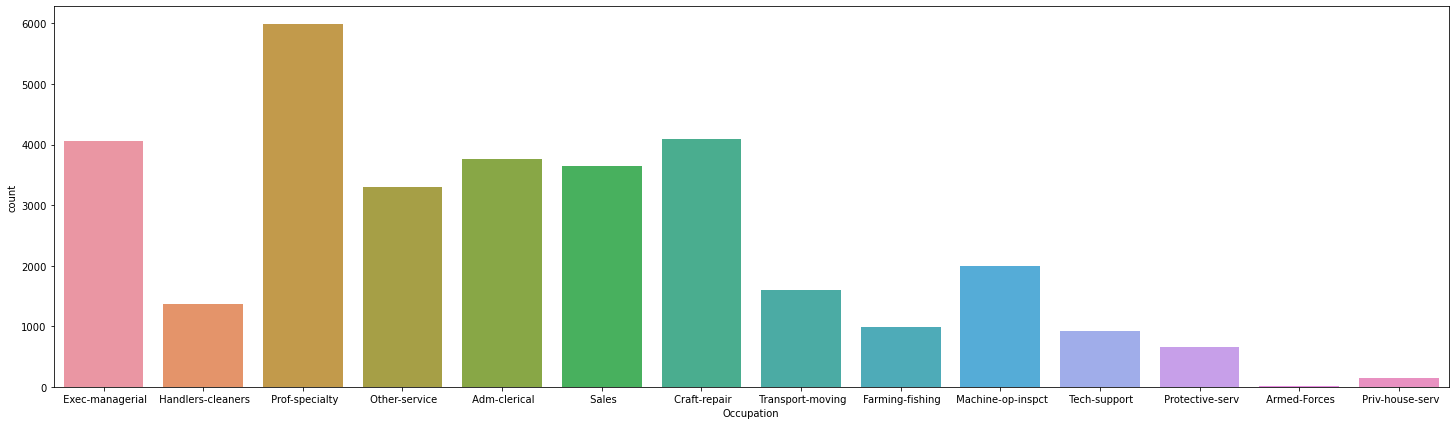

In [32]:
#Count Plot for "Occupation" column
print(census["Occupation"].value_counts())
plt.figure(figsize=(25,7))
sns.countplot("Occupation",data=census)

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64


<AxesSubplot:xlabel='Relationship', ylabel='count'>

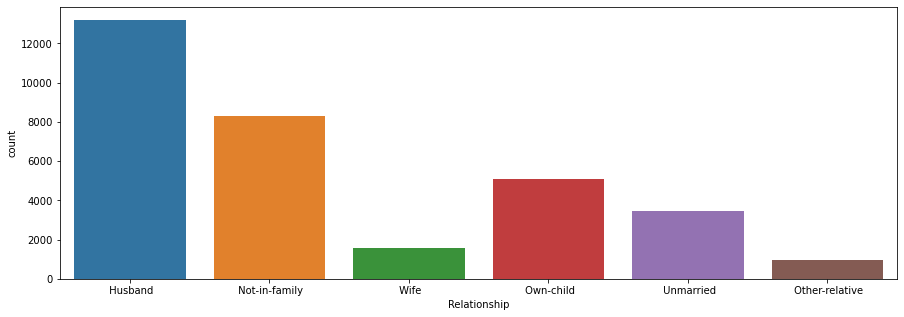

In [33]:
#Count Plot for "Relationship" column
print(census["Relationship"].value_counts())

plt.figure(figsize=(15,5))
sns.countplot("Relationship",data=census)

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64


<AxesSubplot:xlabel='Race', ylabel='count'>

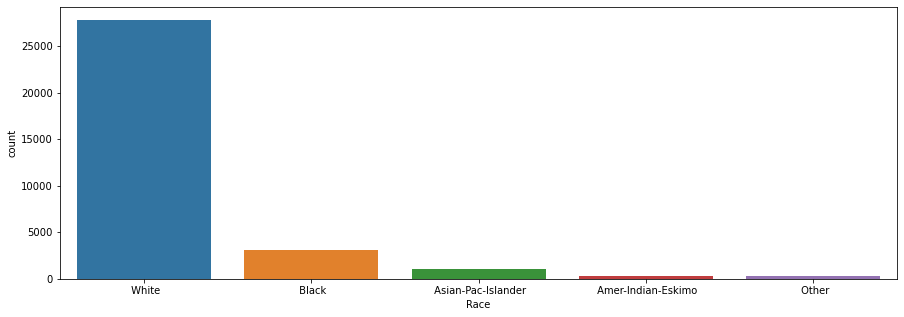

In [34]:
#Count Plot for "Race" column
print(census["Race"].value_counts())

plt.figure(figsize=(15,5))
sns.countplot("Race",data=census)

 Male      21789
 Female    10771
Name: Sex, dtype: int64


<AxesSubplot:xlabel='Sex', ylabel='count'>

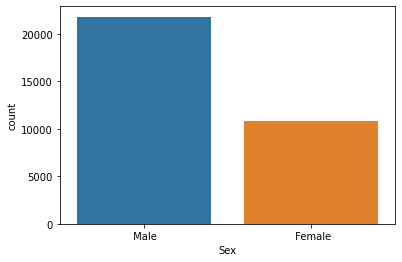

In [35]:
#Count Plot for "Sex" column
print(census["Sex"].value_counts())

sns.countplot("Sex",data=census)

 United-States                 29752
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

<AxesSubplot:xlabel='Native_country', ylabel='count'>

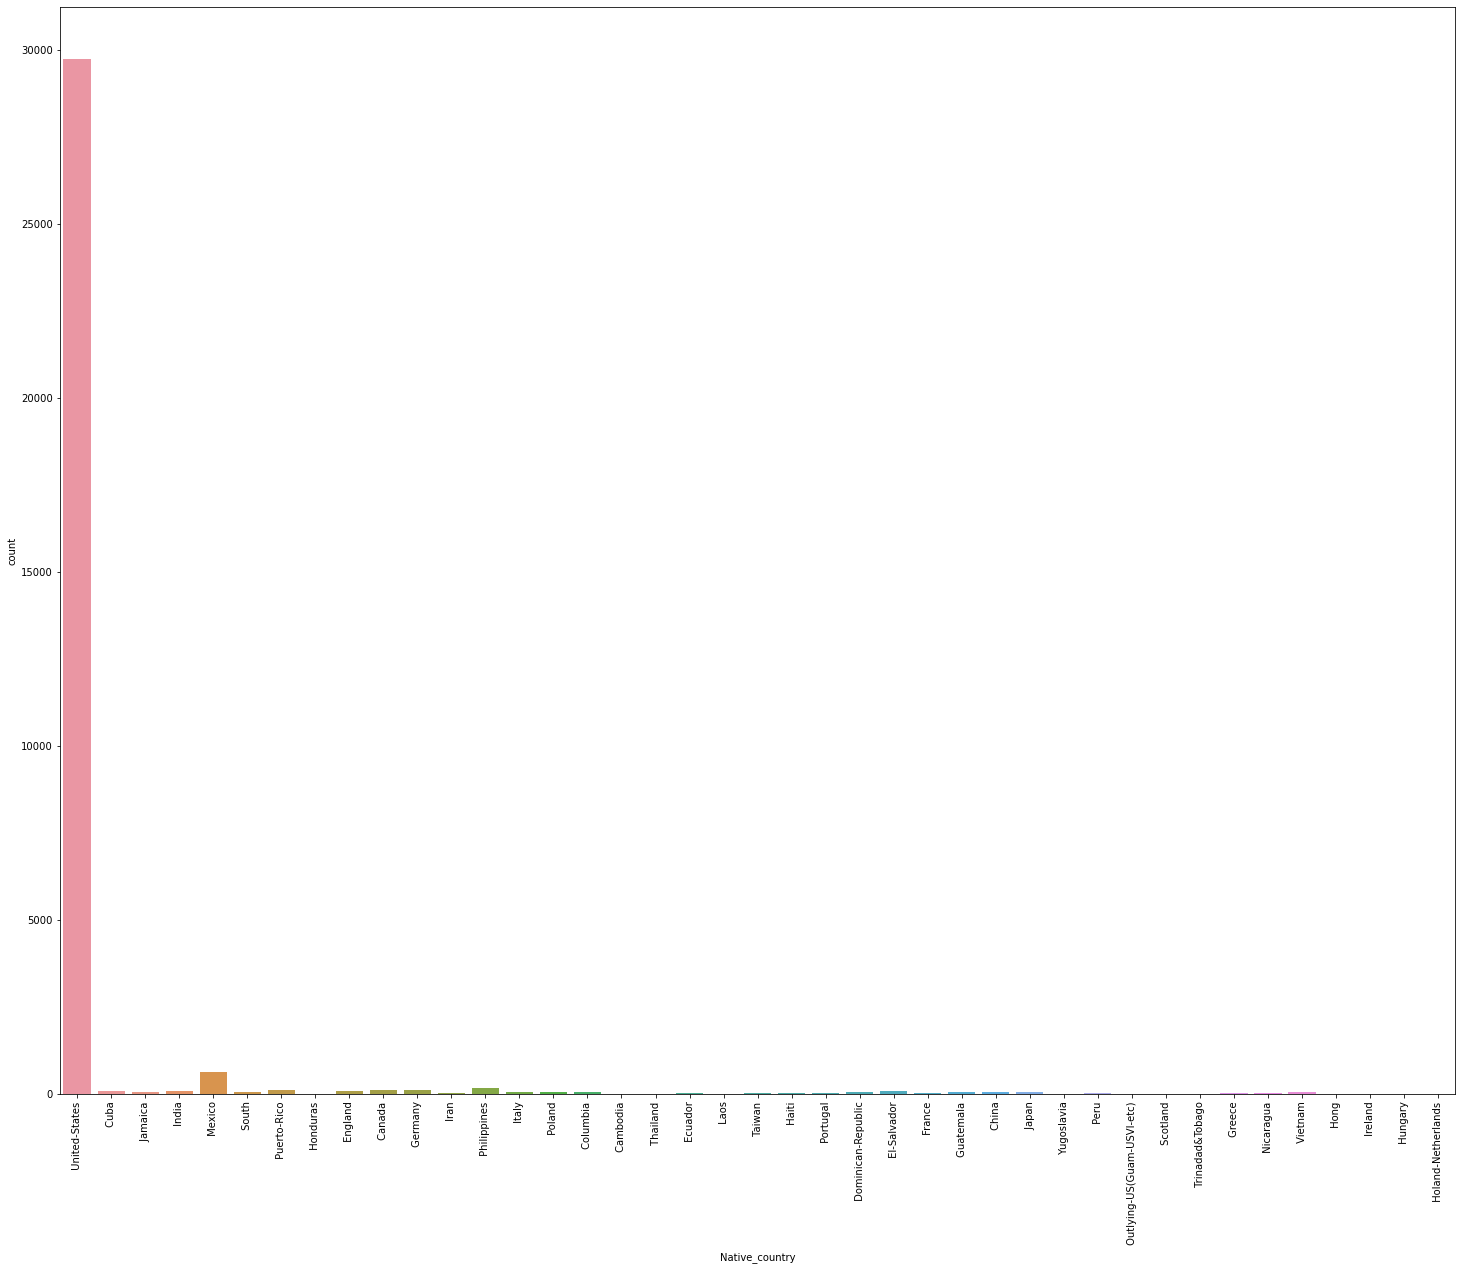

In [36]:
#Count Plot for "Native_country" column
print(census["Native_country"].value_counts())
plt.figure(figsize=(25,20))
plt.xticks(rotation=90)
sns.countplot(x="Native_country",data=census)

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64


<AxesSubplot:xlabel='Income', ylabel='count'>

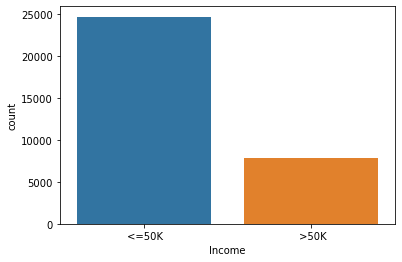

In [37]:
#Count Plot for "Income" column
print(census["Income"].value_counts())

sns.countplot("Income",data=census)

In [38]:
# Visualizing Continuous columns using "HistPlot"

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64


<AxesSubplot:xlabel='Age', ylabel='Count'>

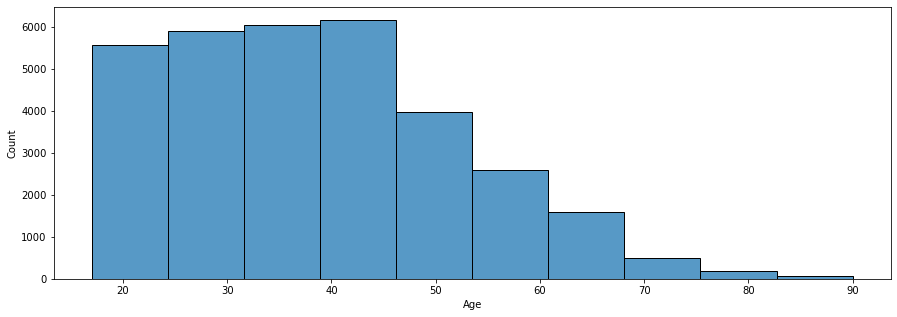

In [39]:
#Histplot for "Age" column
print(census["Age"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x='Age',data=census,bins=10)

164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64


<AxesSubplot:xlabel='Fnlwgt', ylabel='Count'>

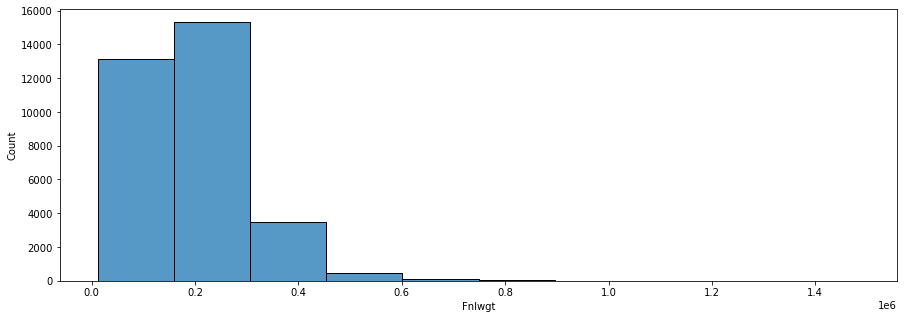

In [40]:
#Histplot for "Fnlwgt" column
print(census["Fnlwgt"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x='Fnlwgt',data=census,bins=10)

9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: Education_num, dtype: int64


<AxesSubplot:xlabel='Education_num', ylabel='Count'>

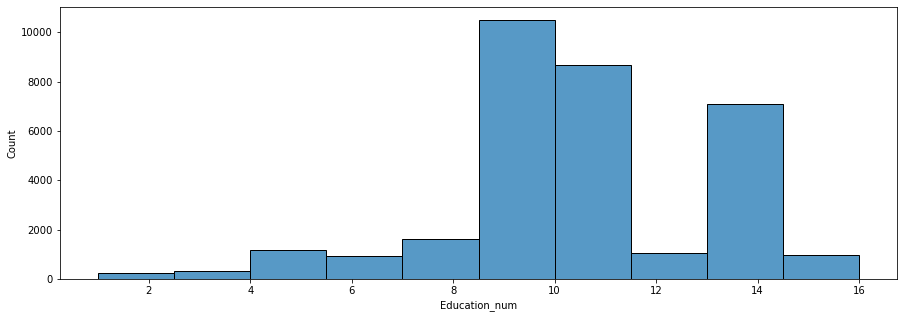

In [41]:
#Histplot for "Education_num" column
print(census["Education_num"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x='Education_num',data=census,bins=10)

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: Capital_gain, Length: 119, dtype: int64


<AxesSubplot:xlabel='Capital_gain', ylabel='Count'>

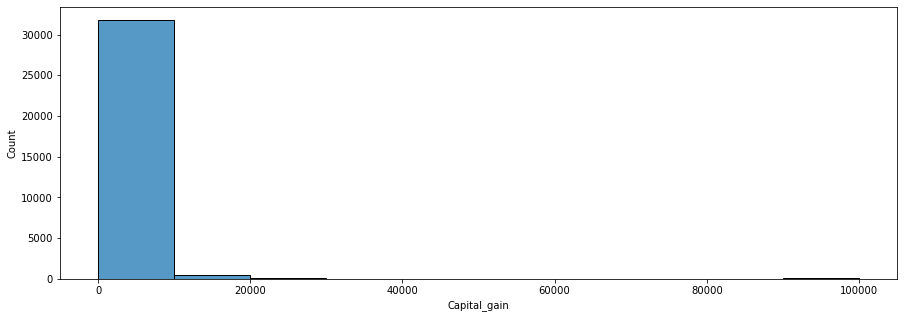

In [42]:
#Histplot for "Capital_gain" column
print(census["Capital_gain"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x='Capital_gain',data=census,bins=10)

0       31041
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: Capital_loss, Length: 92, dtype: int64


<AxesSubplot:xlabel='Capital_loss', ylabel='Count'>

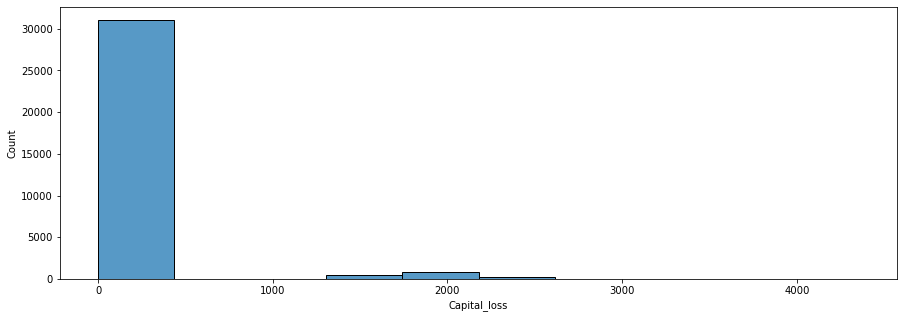

In [43]:
#Histplot for "Capital_loss" column
print(census["Capital_loss"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x='Capital_loss',data=census,bins=10)

40    15216
50     2819
45     1824
60     1475
35     1297
      ...  
82        1
94        1
92        1
74        1
87        1
Name: Hours_per_week, Length: 94, dtype: int64


<AxesSubplot:xlabel='Hours_per_week', ylabel='Count'>

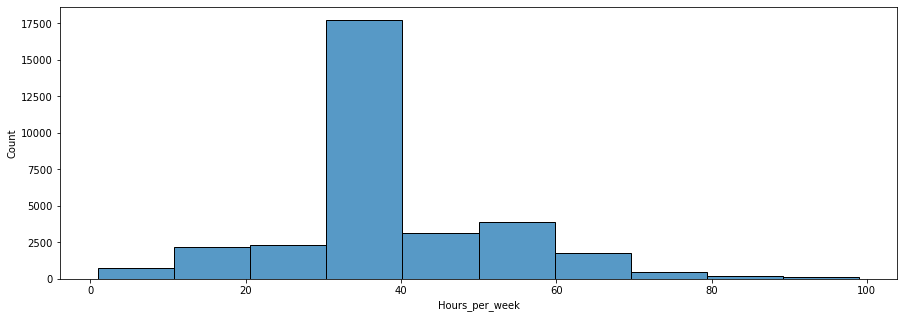

In [44]:
#Histplot for "Hours_per_week" column
print(census["Hours_per_week"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x='Hours_per_week',data=census,bins=10)

In [45]:
# Bivariate Analysis:

<AxesSubplot:xlabel='Workclass', ylabel='count'>

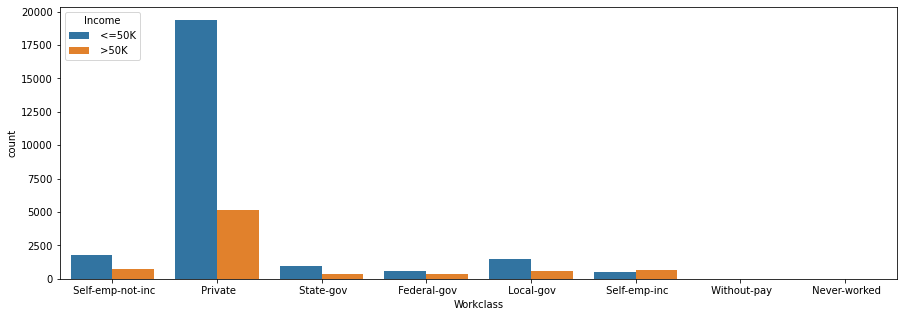

In [46]:
#Count Plot for comparision between "Workclass" column and "Income" column
plt.figure(figsize=(15,5))
sns.countplot("Workclass",data=census, hue='Income')

<AxesSubplot:xlabel='Education', ylabel='count'>

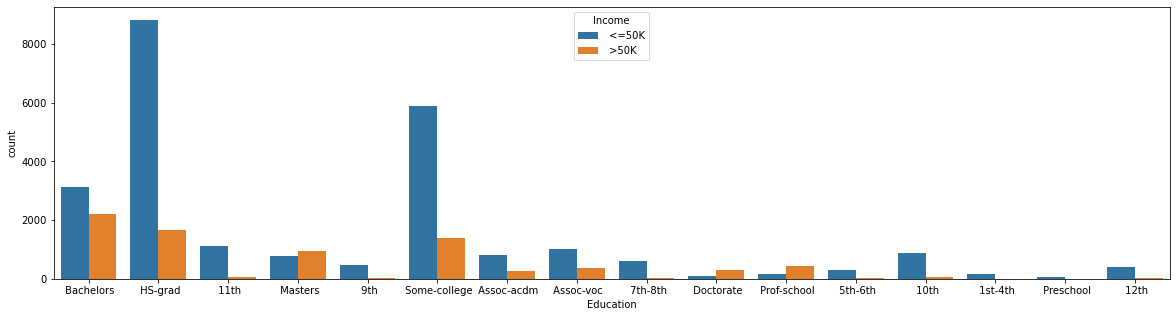

In [47]:
#Count Plot for comparision between "Education" column and "Income" column
plt.figure(figsize=(20,5))
sns.countplot("Education",data=census, hue='Income')

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

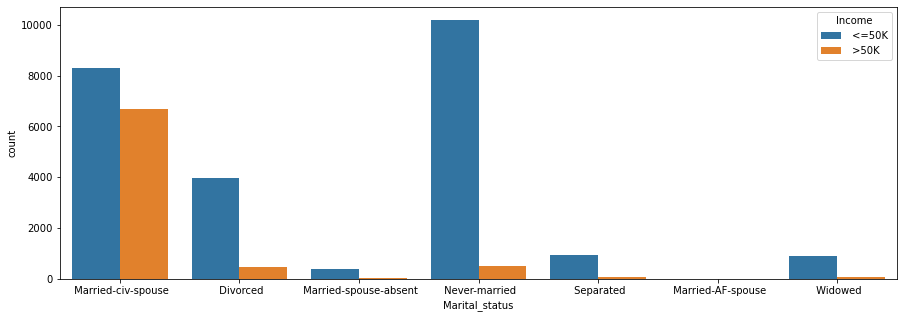

In [48]:
#Count Plot for comparision between "Marital_status" column and "Income" column
plt.figure(figsize=(15,5))
sns.countplot("Marital_status",data=census, hue='Income')

<AxesSubplot:xlabel='Occupation', ylabel='count'>

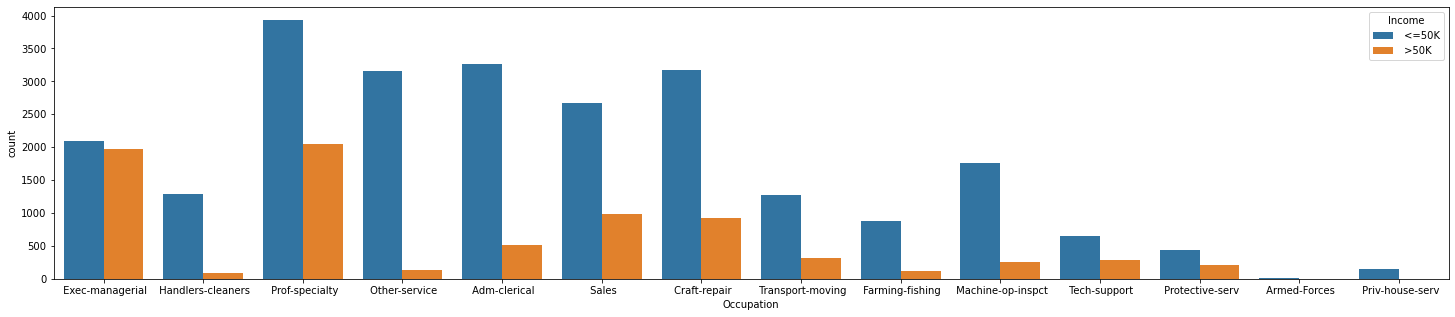

In [49]:
#Count Plot for comparision between "Occupation" column and "Income" column
plt.figure(figsize=(25,5))
sns.countplot("Occupation",data=census, hue='Income')

<AxesSubplot:xlabel='Relationship', ylabel='count'>

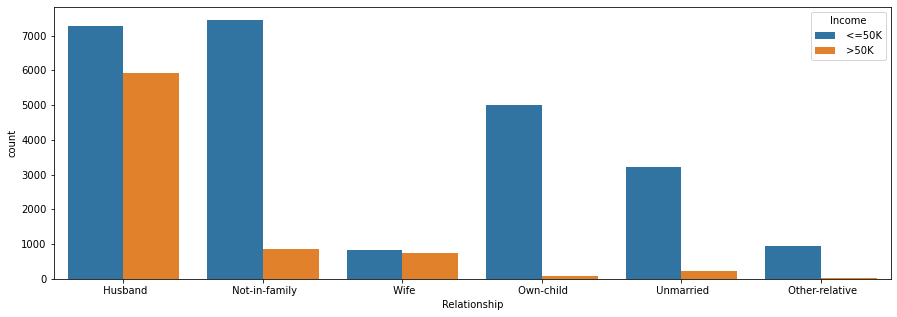

In [50]:
#Count Plot for comparision between "Relationship" column and "Income" column
plt.figure(figsize=(15,5))
sns.countplot("Relationship",data=census, hue='Income')

<AxesSubplot:xlabel='Race', ylabel='count'>

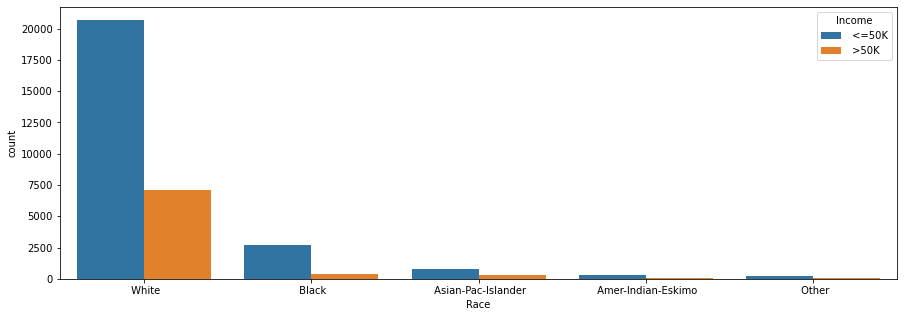

In [51]:
#Count Plot for comparision between "Race" column and "Income" column
plt.figure(figsize=(15,5))
sns.countplot("Race",data=census, hue='Income')

<AxesSubplot:xlabel='Sex', ylabel='count'>

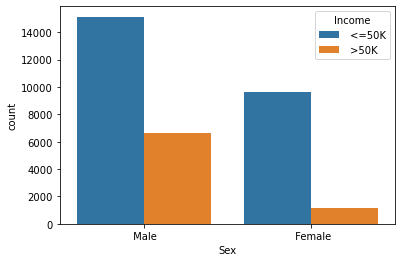

In [52]:
#Count Plot for comparision between "Sex" column and "Income" column
sns.countplot("Sex",data=census, hue='Income')

<AxesSubplot:xlabel='Native_country', ylabel='count'>

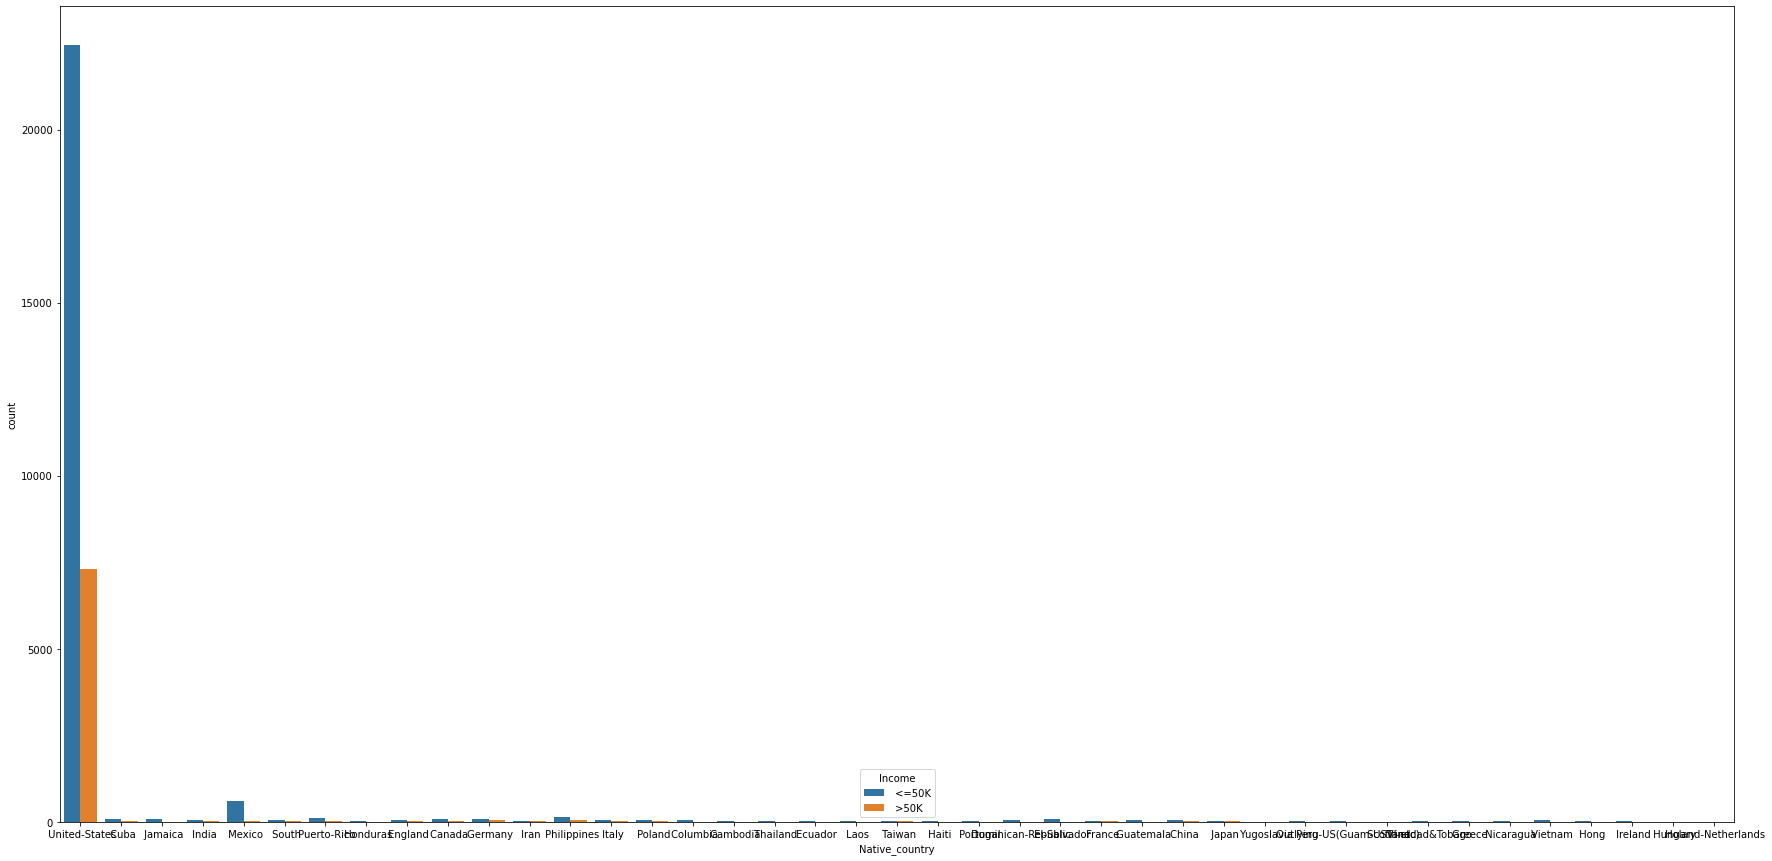

In [53]:
#Count Plot for comparision between "Native_country" column and "Income" column
plt.figure(figsize=(30,15))
sns.countplot("Native_country",data=census, hue='Income')

<AxesSubplot:xlabel='Income', ylabel='Age'>

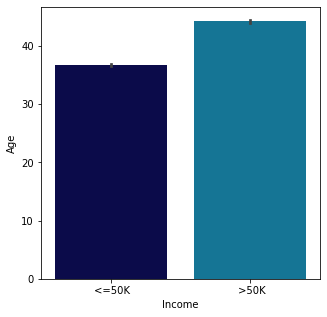

In [54]:
#Bar Plot for comparision between "Age" and "Income" column
plt.figure(figsize=(5,5))
sns.barplot(y='Age', x='Income',data=census, palette='ocean')

<AxesSubplot:xlabel='Income', ylabel='Fnlwgt'>

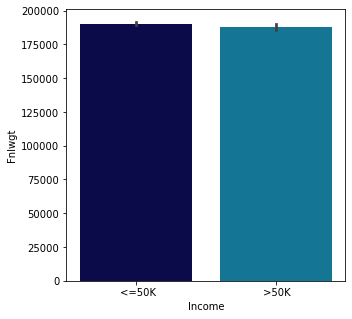

In [55]:
#Bar Plot for comparision between "Fnlwgt" and "Income" column
plt.figure(figsize=(5,5))
sns.barplot(y='Fnlwgt', x='Income',data=census, palette='ocean')

<AxesSubplot:xlabel='Income', ylabel='Education_num'>

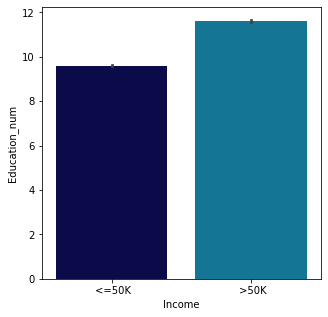

In [56]:
#Bar Plot for comparision between "Education_num" and "Income" column
plt.figure(figsize=(5,5))
sns.barplot(y='Education_num', x='Income',data=census, palette='ocean')

<AxesSubplot:xlabel='Income', ylabel='Capital_gain'>

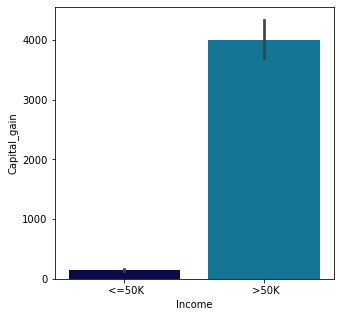

In [57]:
#Bar Plot for comparision between "Capital_gain" and "Income" column
plt.figure(figsize=(5,5))
sns.barplot(y='Capital_gain', x='Income',data=census, palette='ocean')

<AxesSubplot:xlabel='Income', ylabel='Capital_loss'>

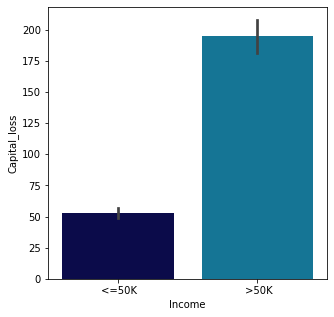

In [58]:
#Bar Plot for comparision between "Capital_loss" and "Income" column
plt.figure(figsize=(5,5))
sns.barplot(y='Capital_loss', x='Income',data=census, palette='ocean')

<AxesSubplot:xlabel='Income', ylabel='Hours_per_week'>

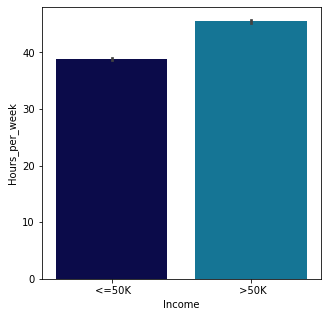

In [59]:
#Bar Plot for comparision between "Hours_per_week" and "Income" column
plt.figure(figsize=(5,5))
sns.barplot(y='Hours_per_week', x='Income',data=census, palette='ocean')

**We observed that the Capital gain and capital loss is not very much related to the target variable . So let's drop this columns and go ahead.**

In [60]:
census.drop(columns = "Capital_gain", inplace = True)

In [61]:
census.drop(columns = "Capital_loss", inplace = True)

# Label Encoding:

**There are some columns where object datatype is present , so we have to use label encoding to convert categorical data to numeric data.**

In [62]:
from sklearn.preprocessing import LabelEncoder

In [63]:
encoder=LabelEncoder()

In [64]:
census['Workclass'] = encoder.fit_transform(census['Workclass'])
census['Education'] = encoder.fit_transform(census['Education'])
census['Marital_status'] = encoder.fit_transform(census['Marital_status'])
census['Occupation'] = encoder.fit_transform(census['Occupation'])
census['Relationship'] = encoder.fit_transform(census['Relationship'])
census['Race'] = encoder.fit_transform(census['Race'])
census['Sex'] = encoder.fit_transform(census['Sex'])
census['Native_country'] = encoder.fit_transform(census['Native_country'])
census['Income'] = encoder.fit_transform(census['Income'])

In [65]:
# To verify , if the datatype converted or not:
census.dtypes

Age               int64
Workclass         int32
Fnlwgt            int64
Education         int32
Education_num     int64
Marital_status    int32
Occupation        int32
Relationship      int32
Race              int32
Sex               int32
Hours_per_week    int64
Native_country    int32
Income            int32
dtype: object

# Correlation:

In [66]:
census.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
Age,1.000000,0.040506,-0.076646,-0.010508,0.036527,-0.266292,0.001740,-0.263698,0.028718,0.088832,0.068756,-0.000271,0.234039
Workclass,0.040506,1.000000,-0.024255,0.004901,0.003445,-0.020545,0.007236,-0.057931,0.048323,0.071535,0.042206,-0.001646,0.002739
Fnlwgt,-0.076646,-0.024255,1.000000,-0.028156,-0.043159,0.028184,0.000138,0.008922,-0.021278,0.026882,-0.018770,-0.063279,-0.009481
Education,-0.010508,0.004901,-0.028156,1.000000,0.359172,-0.038398,-0.041297,-0.010879,0.014135,-0.027349,0.055510,0.076062,0.079311
Education_num,0.036527,0.003445,-0.043159,0.359172,1.000000,-0.069338,0.071012,-0.094145,0.031825,0.012256,0.148127,0.088887,0.335182
Marital_status,-0.266292,-0.020545,0.028184,-0.038398,-0.069338,1.000000,0.035008,0.185461,-0.068025,-0.129337,-0.190521,-0.021285,-0.199295
Occupation,0.001740,0.007236,0.000138,-0.041297,0.071012,0.035008,1.000000,-0.037465,-0.004821,0.047497,-0.012881,-0.002205,0.034599
Relationship,-0.263698,-0.057931,0.008922,-0.010879,-0.094145,0.185461,-0.037465,1.000000,-0.116052,-0.582453,-0.248975,-0.010710,-0.250924
Race,0.028718,0.048323,-0.021278,0.014135,0.031825,-0.068025,-0.004821,-0.116052,1.000000,0.087197,0.041910,0.116526,0.071853
Sex,0.088832,0.071535,0.026882,-0.027349,0.012256,-0.129337,0.047497,-0.582453,0.087197,1.000000,0.229312,0.002055,0.215995


In [67]:
census.corr()["Income"].sort_values()

Relationship     -0.250924
Marital_status   -0.199295
Fnlwgt           -0.009481
Workclass         0.002739
Native_country    0.023063
Occupation        0.034599
Race              0.071853
Education         0.079311
Sex               0.215995
Hours_per_week    0.229690
Age               0.234039
Education_num     0.335182
Income            1.000000
Name: Income, dtype: float64

<AxesSubplot:>

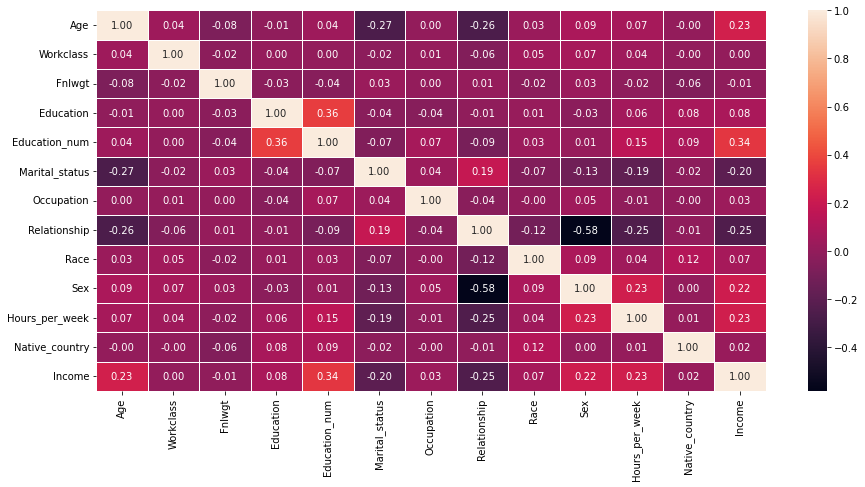

In [68]:
# Visualization of Correlation:
plt.figure(figsize=(15,7))
sns.heatmap(census.corr(),annot=True, linewidth=0.5, linecolor='white', fmt='.2f')

**Maximum correlated columns  is Education_num.**

**Minimum correlated column is Relationship.**

# Outliers Detection:

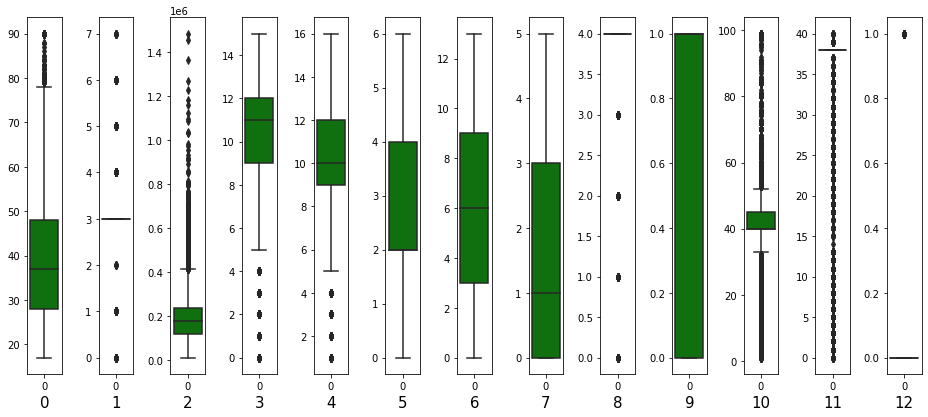

In [69]:
outliers=census.columns.values
ncol=13
nrows=7
plt.figure(figsize=(ncol,3*ncol))
for column in range(0,len(outliers)):
    plt.subplot(nrows,ncol,column+1)
    sns.boxplot(data=census[outliers[column]],color='green',orient='v')
    plt.xlabel(column,fontsize = 15)
    plt.tight_layout()

**Here we observed that Outliers present in columns: 'Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num', 'Race', 'Hours_per_week', 'Native_country', 'Income'.**

**Removing outliers using Z score method:**

In [70]:
variables = census[['Age', 'Fnlwgt', 'Education_num', 'Hours_per_week']]
z=np.abs(zscore(variables))

# Creating new dataframe
census_income = census[(z<3).all(axis=1)]
census_income.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,40,38,0
3,28,3,338409,9,13,2,9,5,2,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,40,38,0


In [71]:
z.head()

,Age,Fnlwgt,Education_num,Hours_per_week
0,0.837097,1.008742,1.134779,2.22212
1,0.042640,0.245046,0.420027,0.03543
2,1.057031,0.425770,1.197429,0.03543
3,0.775755,1.408146,1.134779,0.03543
4,0.115952,0.898170,1.523480,0.03543


In [72]:
census_income.shape

(31461, 13)

In [73]:
# To find number of dropped rows after using Z score method:
census.shape[0]-census_income.shape[0]

1099

In [74]:
# To find the loss in data:

In [75]:
loss=(32560-31461)/32560*100
print(loss,"%")

3.3753071253071254 %


**Checking for skewness:**

In [76]:
census_income.skew()

Age               0.472279
Workclass         0.077358
Fnlwgt            0.634828
Education        -0.949556
Education_num    -0.159752
Marital_status   -0.025162
Occupation        0.003278
Relationship      0.777721
Race             -2.453934
Sex              -0.708658
Hours_per_week   -0.341724
Native_country   -4.362026
Income            1.205962
dtype: float64

**Removing skewness using yeo-johnson method**

In [77]:
from sklearn.preprocessing import PowerTransformer

In [78]:
columns=['Age', 'Fnlwgt', 'Hours_per_week']
census_income[columns]=power_transform(census_income[columns],method='yeo-johnson')
census_income[columns]

,Age,Fnlwgt,Hours_per_week
0,0.915570,-1.114171,-2.228173
1,0.109856,0.427192,-0.053366
2,1.093043,0.607320,-0.053366
3,-0.729959,1.487719,-0.053366
4,0.034167,1.048962,-0.053366
...,...,...,...
32555,-0.826095,0.812145,-0.235369
32556,0.256719,-0.207385,-0.053366
32557,1.372134,-0.235114,-0.053366
32558,-1.352384,0.288776,-1.732436


In [79]:
# To verify if the skewness removed or not:
census_income.skew()

Age              -0.019700
Workclass         0.077358
Fnlwgt           -0.034507
Education        -0.949556
Education_num    -0.159752
Marital_status   -0.025162
Occupation        0.003278
Relationship      0.777721
Race             -2.453934
Sex              -0.708658
Hours_per_week    0.107284
Native_country   -4.362026
Income            1.205962
dtype: float64

# Data Preprocessing:

**Splitting the training and testing dataset:**

In [80]:
x=census_income.drop("Income",axis=1)
y=census_income["Income"]

In [81]:
x.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Hours_per_week', 'Native_country'],
      dtype='object')

In [82]:
x.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,0.915570,5,-1.114171,9,13,2,3,0,4,1,-2.228173,38
1,0.109856,3,0.427192,11,9,0,5,1,4,1,-0.053366,38
2,1.093043,3,0.607320,1,7,2,5,0,2,1,-0.053366,38
3,-0.729959,3,1.487719,9,13,2,9,5,2,0,-0.053366,4
4,0.034167,3,1.048962,12,14,2,3,5,4,0,-0.053366,38


In [83]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Income, dtype: int32

In [84]:
x.shape, y.shape

((31461, 12), (31461,))

In [85]:
y.value_counts()


0    23853
1     7608
Name: Income, dtype: int64

**The data is not balanced. So, we will use oversampling method to balance it.**

**Oversampling using SMOTE:**

In [86]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [87]:
Smote = SMOTE()
x, y = Smote.fit_resample(x,y)

In [88]:
y.value_counts()

0    23853
1    23853
Name: Income, dtype: int64

<AxesSubplot:xlabel='Income', ylabel='count'>

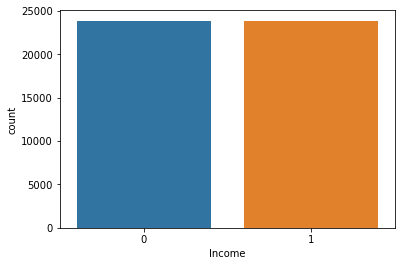

In [89]:
#checking through visualization also
sns.countplot(y)

**Data Scaling:**

In [90]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

In [91]:
x.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,0.814434,1.700034,-1.158435,-0.421353,0.930603,-0.311886,-0.800847,-0.729891,0.363963,0.619666,-2.457199,0.244445
1,-0.061434,-0.059225,0.445128,0.142523,-0.645461,-1.819670,-0.296328,-0.116600,0.363963,0.619666,-0.202854,0.244445
2,1.007360,-0.059225,0.632526,-2.676859,-1.433492,-0.311886,-0.296328,-0.729891,-2.111367,0.619666,-0.202854,0.244445
3,-0.974372,-0.059225,1.548452,-0.421353,0.930603,-0.311886,0.712710,2.336560,-2.111367,-1.613772,-0.202854,-5.541050
4,-0.143713,-0.059225,1.091990,0.424462,1.324619,-0.311886,-0.800847,2.336560,0.363963,-1.613772,-0.202854,0.244445


In [92]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=54)

In [93]:
x.shape, y.shape

((47706, 12), (47706,))

In [94]:
x_train.shape,y_train.shape, x_test.shape,y_test.shape

((33394, 12), (33394,), (14312, 12), (14312,))

**Logistic Regression:**

In [95]:
from sklearn.metrics import confusion_matrix

In [96]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)

print("accuracy_score: ", accuracy_score(y_test, pred_lr))
print("confusion_matrix: \n", confusion_matrix(y_test, pred_lr))
print("classification_report: \n", classification_report(y_test,pred_lr))

accuracy_score:  0.7487423141419788
confusion_matrix: 
 [[5229 1972]
 [1624 5487]]
classification_report: 
               precision    recall  f1-score   support

           0       0.76      0.73      0.74      7201
           1       0.74      0.77      0.75      7111

    accuracy                           0.75     14312
   macro avg       0.75      0.75      0.75     14312
weighted avg       0.75      0.75      0.75     14312



In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN

**Random Forest Classifier:**

In [98]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)
pred_rfc = rfc.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_rfc))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_rfc))
print("classification_report: \n",classification_report(y_test,pred_rfc))

accuracy_score:  0.8684320849636669
confusion_matrix: 
 [[6103 1098]
 [ 785 6326]]
classification_report: 
               precision    recall  f1-score   support

           0       0.89      0.85      0.87      7201
           1       0.85      0.89      0.87      7111

    accuracy                           0.87     14312
   macro avg       0.87      0.87      0.87     14312
weighted avg       0.87      0.87      0.87     14312



**Decision Tree Classifier**

In [99]:
from sklearn.tree import DecisionTreeClassifier

In [100]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred_dtc = dtc.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_dtc))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_dtc))

print("classification_report: \n",classification_report(y_test,pred_dtc))

accuracy_score:  0.8137926215762996
confusion_matrix: 
 [[5849 1352]
 [1313 5798]]
classification_report: 
               precision    recall  f1-score   support

           0       0.82      0.81      0.81      7201
           1       0.81      0.82      0.81      7111

    accuracy                           0.81     14312
   macro avg       0.81      0.81      0.81     14312
weighted avg       0.81      0.81      0.81     14312



**Support Vector Machine Classifier**

In [101]:
svc = SVC(kernel='linear', gamma=3)
svc.fit(x_train,y_train)
pred_svc = svc.predict(x_test)

print("accuracy_score: ", accuracy_score(y_test, pred_svc))
print("confusion_matrix: \n", confusion_matrix(y_test, pred_svc))
print("classification_report: \n", classification_report(y_test,pred_svc))

accuracy_score:  0.7544019005030743
confusion_matrix: 
 [[5098 2103]
 [1412 5699]]
classification_report: 
               precision    recall  f1-score   support

           0       0.78      0.71      0.74      7201
           1       0.73      0.80      0.76      7111

    accuracy                           0.75     14312
   macro avg       0.76      0.75      0.75     14312
weighted avg       0.76      0.75      0.75     14312



**KNN Classifier**

In [102]:
knn = KNN()
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_knn))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_knn))
print("classification_report: \n",classification_report(y_test,pred_knn))

accuracy_score:  0.835103409726104
confusion_matrix: 
 [[5545 1656]
 [ 704 6407]]
classification_report: 
               precision    recall  f1-score   support

           0       0.89      0.77      0.82      7201
           1       0.79      0.90      0.84      7111

    accuracy                           0.84     14312
   macro avg       0.84      0.84      0.83     14312
weighted avg       0.84      0.84      0.83     14312



In [103]:
print('CV score for Logistic Regression: ',cross_val_score(lr,x,y,cv=5).mean())


CV score for Logistic Regression:  0.7500106623202216


In [104]:
print('CV score for Random forest Classifier: ',cross_val_score(rfc,x,y,cv=5).mean())

CV score for Random forest Classifier:  0.8760543356320023


In [105]:
print('CV score for Decision Tree Classifier: ',cross_val_score(dtc,x,y,cv=5).mean())

CV score for Decision Tree Classifier:  0.8213868063722428


**So we observed that on the Basis of  Accuracy Score ,Cross-validation Score and performance of the model. we will go ahead with the  Random Forest Classifier.**

In [121]:
rfc.fit(x_train, y_train)

RandomForestClassifier(random_state=30)

In [123]:
# Comparing Predicted and actual values:
a =np.array(y_test)
predicted=np.array(rfc.predict(x_test))
Census_Income_=pd.DataFrame({'Orginal':a,'Predicted':predicted}, index=range(len(a)))
Census_Income_

,Orginal,Predicted
0,1,0
1,0,0
2,0,0
3,1,1
4,1,0
...,...,...
14307,1,1
14308,1,1
14309,1,1
14310,1,1


In [124]:
# Saving the Output in csv format:
Output =Census_Income_.to_csv('Census_Income_.csv')
Output

# Conclusion:

**We got the cross validation score of 87% using random forest classifier , which is quite satisfying . Achieving this much of score indicates that model is predicting quite good.**